In [106]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [83]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [3]:
df_2020= pd.read_csv (r'full_2020.csv')
df_2019 = pd.read_csv (r'full_2019.csv')
df_2018 = pd.read_csv (r'full_2018.csv')

In [28]:
full.head()

,Spot,date,time,range,height_ft,swell_dir,swell_angle,period_sec,wind_kmh,wind_dir,wind,wind_angle,temp_°c,Conditions,Condition_ratings
0,Nazare,2018-01-01,6am,20-30ft,15.5,WNW,292,15,6,S,Cross/Offshore,186,8,Good,4
1,Nazare,2018-01-01,12pm,18-28ft,14.5,WNW,292,15,14,W,Onshore,277,15,Good,4
2,Nazare,2018-01-01,6pm,18-26ft,13.5,WNW,293,14,6,WSW,Onshore,253,11,Good,4
3,Nazare,2018-02-01,6am,16-26ft,12.5,WNW,297,14,5,SSW,Cross-shore,207,10,Good,4
4,Nazare,2018-02-01,12pm,14-24ft,11.5,WNW,297,14,11,WSW,Onshore,258,16,Good,4


In [4]:
full = pd.concat([df_2018,df_2019,df_2020], ignore_index=True)

In [10]:
full["date"] = pd.to_datetime(full.date)

In [204]:
full.Spot.value_counts()

Nazare              3288
Pipeline            3288
Fronton             3288
The Box             3288
Puerto Escondido    3288
Itacoatiara         3288
Padang-Padang       3288
Mosca Point         3288
Tauro               3288
Mundaka             2193
Name: Spot, dtype: int64

In [22]:
conditions_rank = {
    'Epic':5, 
    'Good':4, 
    'Mediocre':3, 
    'Choppy':2,
    'Not recommended':1
}

In [27]:
full["Condition_ratings"] = full.Conditions.map(conditions_rank)

In [42]:
def group_by (col):
    full_prueba = full.groupby(["date","Spot"])[f'{col}'].agg("mean")
    df1 = pd.DataFrame(full_prueba)
    df1 = df1.reset_index()
    return df1
    

In [142]:
height = group_by("height_ft")

In [143]:
height

,date,Spot,height_ft
0,2018-01-01,Fronton,3.333333
1,2018-01-01,Itacoatiara,0.800000
2,2018-01-01,Mosca Point,3.666667
3,2018-01-01,Nazare,14.500000
4,2018-01-01,Padang-Padang,5.666667
...,...,...,...
10590,2020-12-31,Padang-Padang,4.000000
10591,2020-12-31,Pipeline,9.000000
10592,2020-12-31,Puerto Escondido,1.833333
10593,2020-12-31,Tauro,0.900000


In [46]:
wind_speed = group_by("wind_kmh")

In [48]:
wind_speed.head()

,date,Spot,wind_kmh
0,2018-01-01,Fronton,19.666667
1,2018-01-01,Itacoatiara,9.666667
2,2018-01-01,Mosca Point,19.666667
3,2018-01-01,Nazare,8.666667
4,2018-01-01,Padang-Padang,12.333333


In [50]:
rating = group_by("Condition_ratings")

In [51]:
rating.head()

,date,Spot,Condition_ratings
0,2018-01-01,Fronton,5.0
1,2018-01-01,Itacoatiara,1.0
2,2018-01-01,Mosca Point,5.0
3,2018-01-01,Nazare,4.0
4,2018-01-01,Padang-Padang,3.0


In [52]:
from statsmodels.tsa.stattools import adfuller

In [54]:
dickey_height = adfuller(height["height_ft"])
dickey_height

(-12.0357021851382,
 2.8066770743884147e-22,
 39,
 10555,
 {'1%': -3.430969695978145,
  '5%': -2.8618138703454576,
  '10%': -2.5669157760426144},
 47202.80708705075)

In [55]:
dickey_wind = adfuller(wind_speed["wind_kmh"])
dickey_wind

(-11.767096491621826,
 1.1123238916061825e-21,
 39,
 10555,
 {'1%': -3.430969695978145,
  '5%': -2.8618138703454576,
  '10%': -2.5669157760426144},
 67831.33577937541)

In [63]:
dickey_condition= adfuller(rating["Condition_ratings"])
dickey_condition

(-9.892108943382373,
 3.535486258522491e-17,
 39,
 10555,
 {'1%': -3.430969695978145,
  '5%': -2.8618138703454576,
  '10%': -2.5669157760426144},
 26799.743742309172)

In [65]:
adf, pvalue, usedlag, nobs, critical_values, icbest = dickey_height

In [66]:
adf

-12.0357021851382

In [67]:
critical_values

{'1%': -3.430969695978145,
 '5%': -2.8618138703454576,
 '10%': -2.5669157760426144}

In [68]:
adf, pvalue, usedlag, nobs, critical_values, icbest = dickey_wind

In [69]:
adf

-11.767096491621826

In [70]:
critical_values

{'1%': -3.430969695978145,
 '5%': -2.8618138703454576,
 '10%': -2.5669157760426144}

In [71]:
adf, pvalue, usedlag, nobs, critical_values, icbest = dickey_condition

In [72]:
adf

-9.892108943382373

In [73]:
critical_values

{'1%': -3.430969695978145,
 '5%': -2.8618138703454576,
 '10%': -2.5669157760426144}

## ARMA

### Nazare

#### wave height

In [340]:
nazare = height[height["Spot"] == "Nazare"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(nazare.date)

nazare = nazare.set_index("date")

In [341]:
nazare.head()

,Spot,height_ft
date,,
2018-01-01,Nazare,14.500000
2018-01-02,Nazare,6.833333
2018-01-03,Nazare,9.833333
2018-01-04,Nazare,4.666667
2018-01-05,Nazare,4.833333


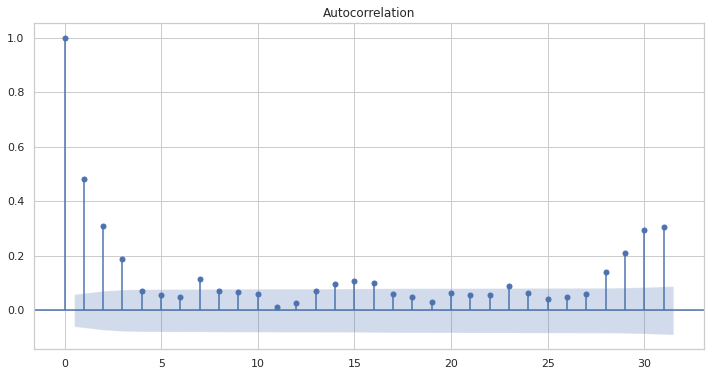

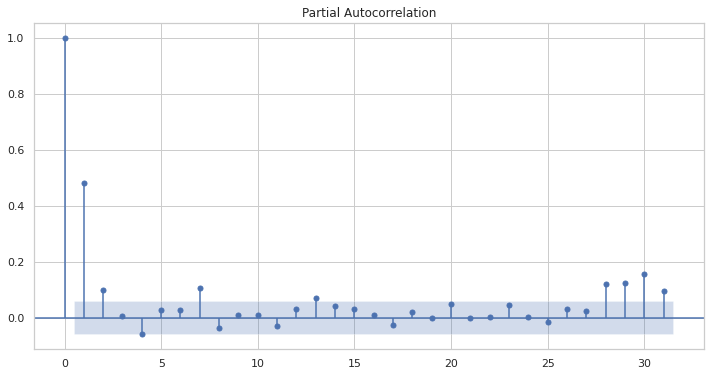

In [342]:
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,10))
plot_acf(nazare["height_ft"]);
plot_pacf(nazare["height_ft"]);
pyplot.show()

In [343]:
orders = (4,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_nazare = ARIMA(nazare['height_ft'], order = orders)
model_nazare;


/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [344]:
arma1 = model_nazare.fit()
print(arma1.summary())


                              ARMA Model Results                              
Dep. Variable:              height_ft   No. Observations:                 1096
Model:                     ARMA(4, 3)   Log Likelihood               -2739.845
Method:                       css-mle   S.D. of innovations              2.947
Date:                Wed, 06 Oct 2021   AIC                           5497.690
Time:                        13:54:40   BIC                           5542.685
Sample:                    01-01-2018   HQIC                          5514.715
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.3707      0.179     35.575      0.000       6.020       6.722
ar.L1.height_ft     0.0210      0.338      0.062      0.950      -0.641       0.683
ar.L2.height_ft     0.1389      

#### Wind speed

In [185]:
nazare_wind = wind_speed[wind_speed["Spot"] == "Nazare"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(nazare_wind.date)

nazare_wind = nazare_wind.set_index("date")

In [187]:
nazare_wind.head()

,Spot,wind_kmh
date,,
2018-01-01,Nazare,8.666667
2018-01-02,Nazare,31.000000
2018-01-03,Nazare,29.000000
2018-01-04,Nazare,18.666667
2018-01-05,Nazare,17.000000


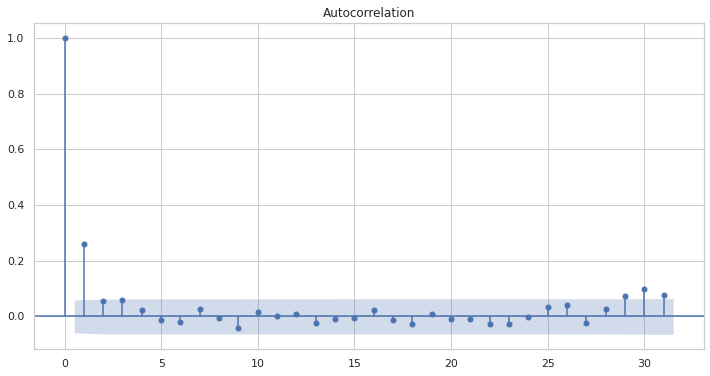

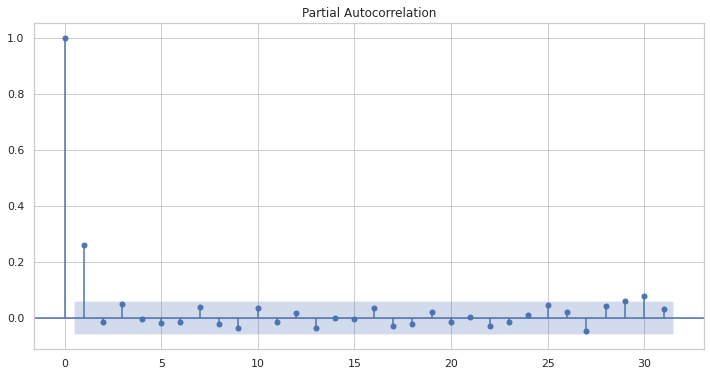

In [188]:
plot_acf(nazare_wind["wind_kmh"]);
plot_pacf(nazare_wind["wind_kmh"]);
pyplot.show()

In [189]:
orders = (2,0,2) # esto dependerá de lo que nos salga en las columnas anteriores
model_nazare_wind = ARIMA(nazare_wind['wind_kmh'], order = orders)
model_nazare_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [190]:
arma2 = model_nazare_wind.fit()
print(arma2.summary())

                              ARMA Model Results                              
Dep. Variable:               wind_kmh   No. Observations:                 1096
Model:                     ARMA(2, 2)   Log Likelihood               -3649.350
Method:                       css-mle   S.D. of innovations              6.758
Date:                Tue, 05 Oct 2021   AIC                           7310.700
Time:                        20:53:43   BIC                           7340.696
Sample:                    01-01-2018   HQIC                          7322.050
                         - 12-31-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.7955      0.285     48.427      0.000      13.237      14.354
ar.L1.wind_kmh     0.1605      0.508      0.316      0.752      -0.835       1.156
ar.L2.wind_kmh     0.1696      0.146

### Pipeline

#### Wave height

In [194]:
pipe_wave = height[height["Spot"] == "Pipeline"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(pipe_wave.date)

pipe_wave = pipe_wave.set_index("date")

In [195]:
pipe_wave.head()

,Spot,height_ft
date,,
2018-01-01,Pipeline,4.500000
2018-01-02,Pipeline,6.833333
2018-01-03,Pipeline,1.500000
2018-01-04,Pipeline,5.000000
2018-01-05,Pipeline,5.000000


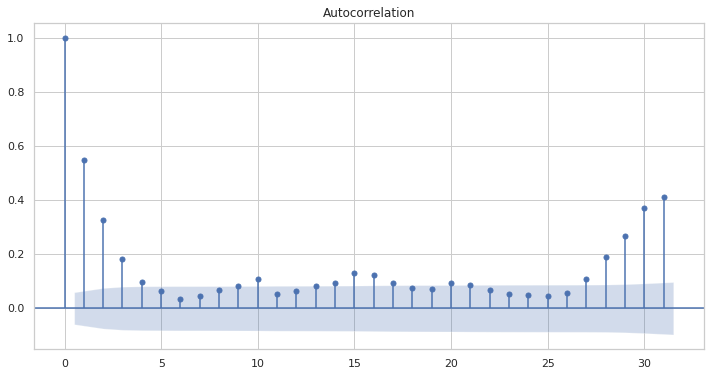

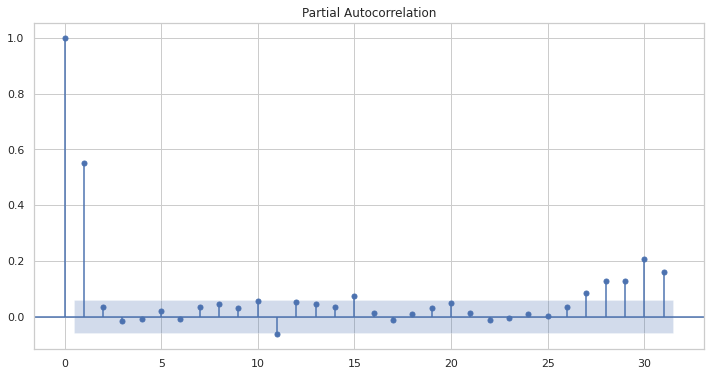

In [196]:
plot_acf(pipe_wave["height_ft"]);
plot_pacf(pipe_wave["height_ft"]);
pyplot.show()

In [197]:
orders = (5,0,2) # esto dependerá de lo que nos salga en las columnas anteriores
model_pipe_wave = ARIMA(pipe_wave['height_ft'], order = orders)
model_pipe_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [198]:
arma3 = model_pipe_wave.fit()
print(arma3.summary())

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.50000D+00    |proj g|=  1.44378D-03

At iterate    5    f=  2.49997D+00    |proj g|=  1.40274D-03

At iterate   10    f=  2.49991D+00    |proj g|=  1.37073D-03

At iterate   15    f=  2.49989D+00    |proj g|=  6.09157D-04

At iterate   20    f=  2.49987D+00    |proj g|=  1.93445D-04

At iterate   25    f=  2.49986D+00    |proj g|=  7.35056D-04

At iterate   30    f=  2.49986D+00    |proj g|=  4.22329D-05

At iterate   35    f=  2.49986D+00    |proj g|=  3.46390D-06

At iterate   40    f=  2.49986D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

#### Wind speed

In [199]:
pipe_wind = wind_speed[wind_speed["Spot"] == "Pipeline"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(pipe_wind.date)

pipe_wind = pipe_wind.set_index("date")

In [200]:
pipe_wind.head()

,Spot,wind_kmh
date,,
2018-01-01,Pipeline,14.000000
2018-01-02,Pipeline,18.000000
2018-01-03,Pipeline,13.666667
2018-01-04,Pipeline,2.666667
2018-01-05,Pipeline,4.666667


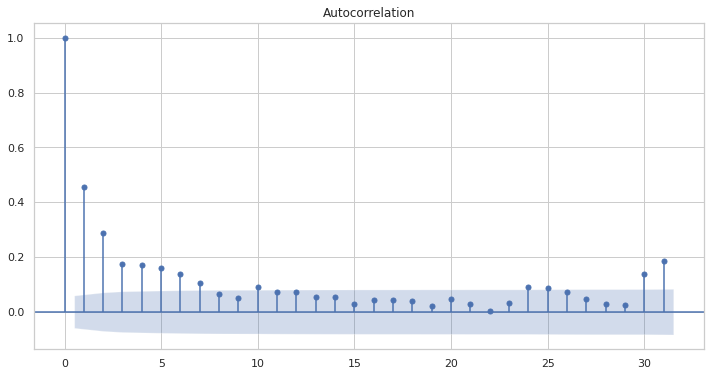

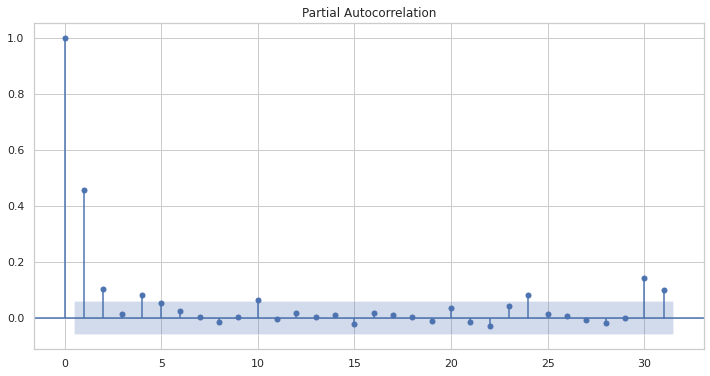

In [201]:
plot_acf(pipe_wind["wind_kmh"]);
plot_pacf(pipe_wind["wind_kmh"]);
pyplot.show()

In [202]:
orders = (8,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_pipe_wind = ARIMA(pipe_wind['wind_kmh'], order = orders)
model_pipe_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [203]:
arma4 = model_pipe_wind.fit()
print(arma4.summary())

                              ARMA Model Results                              
Dep. Variable:               wind_kmh   No. Observations:                 1096
Model:                     ARMA(8, 3)   Log Likelihood               -3555.453
Method:                       css-mle   S.D. of innovations              6.201
Date:                Tue, 05 Oct 2021   AIC                           7136.906
Time:                        21:20:30   BIC                           7201.898
Sample:                    01-01-2018   HQIC                          7161.497
                         - 12-31-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             16.5657      0.468     35.390      0.000      15.648      17.483
ar.L1.wind_kmh    -1.0464      0.074    -14.135      0.000      -1.191      -0.901
ar.L2.wind_kmh    -0.7577      0.048

### Fronton

#### Wave height

In [205]:
fronton_wave = height[height["Spot"] == "Fronton"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(fronton_wave.date)

fronton_wave = fronton_wave.set_index("date")

In [206]:
fronton_wave.head()

,Spot,height_ft
date,,
2018-01-01,Fronton,3.333333
2018-01-02,Fronton,7.666667
2018-01-03,Fronton,5.833333
2018-01-04,Fronton,4.833333
2018-01-05,Fronton,2.833333


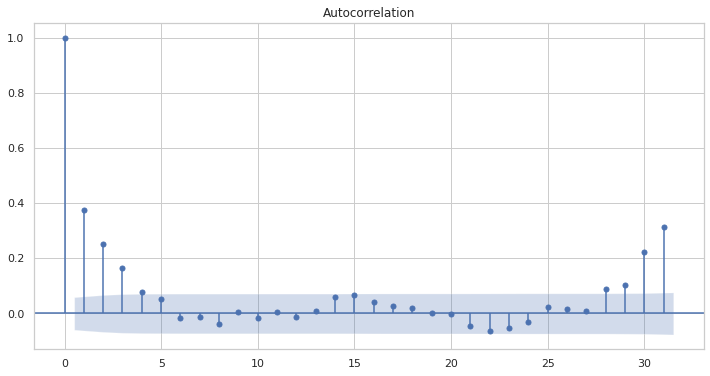

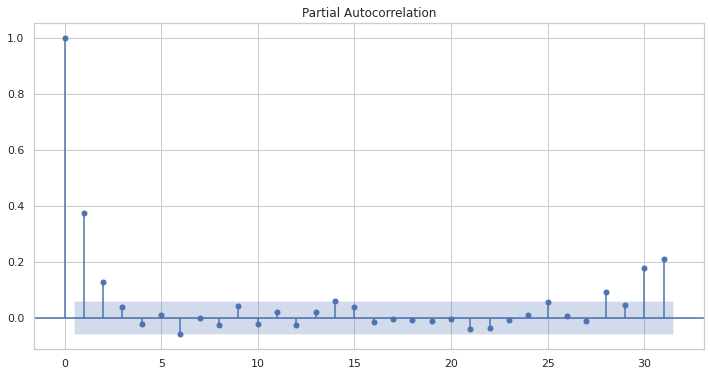

In [207]:
plot_acf(fronton_wave["height_ft"]);
plot_pacf(fronton_wave["height_ft"]);
pyplot.show()

In [208]:
orders = (5,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_fronton_wave = ARIMA(fronton_wave['height_ft'], order = orders)
model_fronton_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [209]:
arma5 = model_fronton_wave.fit()
print(arma5.summary())

                              ARMA Model Results                              
Dep. Variable:              height_ft   No. Observations:                 1096
Model:                     ARMA(5, 3)   Log Likelihood               -2024.653
Method:                       css-mle   S.D. of innovations              1.535
Date:                Wed, 06 Oct 2021   AIC                           4069.307
Time:                        09:41:50   BIC                           4119.301
Sample:                    01-01-2018   HQIC                          4088.223
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.6609      0.087     41.961      0.000       3.490       3.832
ar.L1.height_ft     0.6581      0.152      4.326      0.000       0.360       0.956
ar.L2.height_ft     0.1542      

### Wind Speed

In [212]:
fronton_wind = wind_speed[wind_speed["Spot"] == "Fronton"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(fronton_wind.date)

fronton_wind = fronton_wind.set_index("date")

In [213]:
fronton_wind.head()

,Spot,wind_kmh
date,,
2018-01-01,Fronton,19.666667
2018-01-02,Fronton,31.000000
2018-01-03,Fronton,30.333333
2018-01-04,Fronton,4.000000
2018-01-05,Fronton,18.333333


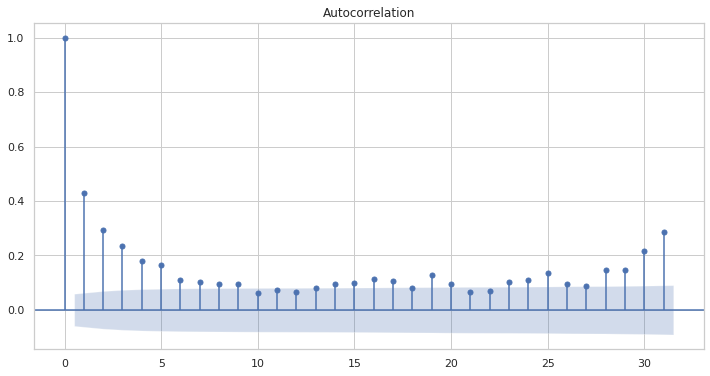

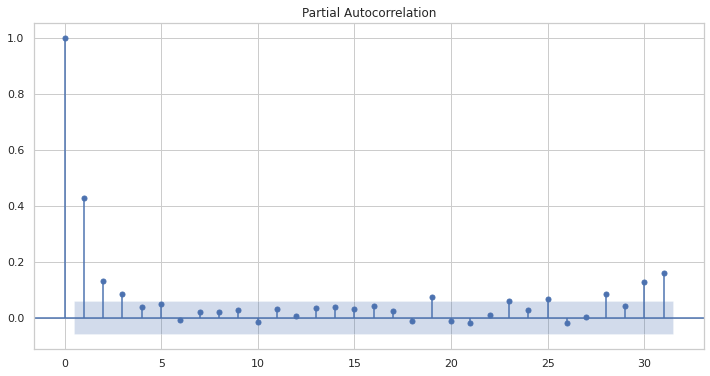

In [214]:
plot_acf(fronton_wind["wind_kmh"]);
plot_pacf(fronton_wind["wind_kmh"]);
pyplot.show()

In [215]:
orders = (10,0,4) # esto dependerá de lo que nos salga en las columnas anteriores
model_fronton_wind = ARIMA(fronton_wind['wind_kmh'], order = orders)
model_fronton_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [216]:
arma6 = model_fronton_wind.fit()
print(arma6.summary())

  ys=-5.889E-11  -gs= 5.184E-11 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8    239    381      3     1     0   1.723D-05   2.048D+00
  F =   2.0477458069276975     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24712D+00    |proj g|=  8.52949D-03

At iterate    5    f=  3.24669D+00    |proj g|=  2.80611D-03

At iterate   10    f=  3.24531D+00    |proj g|=  9.17821D-03

At iterate   15  

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                              ARMA Model Results                              
Dep. Variable:               wind_kmh   No. Observations:                 1096
Model:                    ARMA(10, 4)   Log Likelihood               -3363.751
Method:                       css-mle   S.D. of innovations              5.188
Date:                Wed, 06 Oct 2021   AIC                           6759.502
Time:                        09:46:51   BIC                           6839.493
Sample:                    01-01-2018   HQIC                          6789.768
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              13.5904      0.390     34.891      0.000      12.827      14.354
ar.L1.wind_kmh      0.9364      0.030     30.865      0.000       0.877       0.996
ar.L2.wind_kmh     -0.3098      

### The box

In [243]:
import numpy as np

#### Wave height

In [247]:
box_wave = height[height["Spot"] == "The Box"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(box_wave.date)

box_wave = box_wave.set_index("date")

In [256]:
box_wave.head()

,Spot,height_ft,height_ft2
date,,,
2018-01-01,The Box,8.500000,8.500000
2018-01-02,The Box,1.633333,-6.866667
2018-01-03,The Box,6.500000,4.866667
2018-01-04,The Box,7.666667,1.166667
2018-01-05,The Box,9.833333,2.166667


In [251]:
box_wave['height_ft2'] = box_wave['height_ft'] - box_wave['height_ft'].shift(1)

In [255]:
box_wave.height_ft2[0] = box_wave.height_ft[0]

/tmp/ipykernel_570/2771674257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_wave.height_ft2[0] = box_wave.height_ft[0]


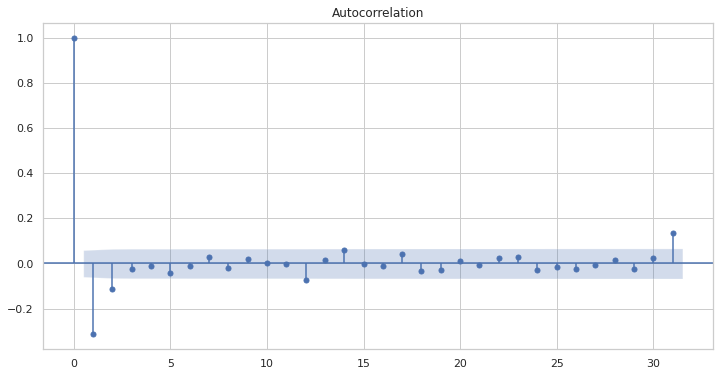

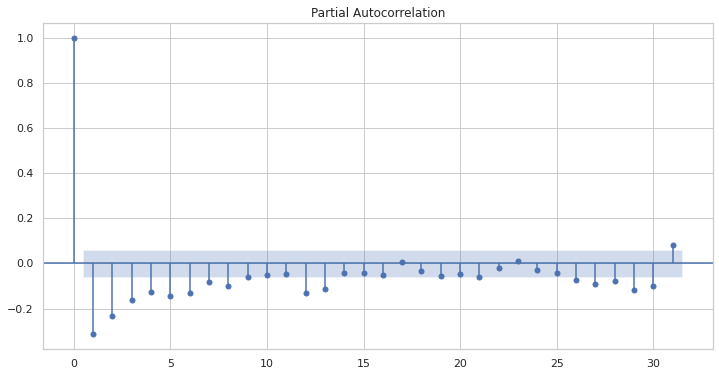

In [257]:
plot_acf(box_wave["height_ft2"]);
plot_pacf(box_wave["height_ft2"]);
pyplot.show()

In [258]:
orders = (3,0,10) # esto dependerá de lo que nos salga en las columnas anteriores
model_box_wave = ARIMA(box_wave['height_ft2'], order = orders)
model_box_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [259]:
arma7 = model_box_wave.fit()
print(arma7.summary())

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.55365D+00    |proj g|=  1.31063D-01

At iterate    5    f=  2.55343D+00    |proj g|=  2.47142D-02

At iterate   10    f=  2.55329D+00    |proj g|=  3.19480D-02

At iterate   15    f=  2.55328D+00    |proj g|=  1.78854D-02

At iterate   20    f=  2.55327D+00    |proj g|=  2.35771D-03

At iterate   25    f=  2.55324D+00    |proj g|=  1.13243D-03

At iterate   30    f=  2.55324D+00    |proj g|=  4.75753D-03

At iterate   35    f=  2.55322D+00    |proj g|=  2.11098D-03

At iterate   40    f=  2.55322D+00    |proj g|=  2.00995D-04

At iterate   45    f=  2.55322D+00    |proj g|=  1.37521D-03

At iterate   50    f=  2.55322D+00    |proj g|=  3.77374D-03

At iterate   55    f=  2.55321D+00    |proj g|=  6.65334D-04

At iterate   60    f=  2.55320D+00    |proj g|=  2.55262D-04

At iterate   65    f=  2.55320D+00    |proj g|=  8.71303D-05

At iterate   70    f=  2.55320D+00    |proj g|=  5.75540D-05

At iterate   75  

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, 

                              ARMA Model Results                              
Dep. Variable:             height_ft2   No. Observations:                 1096
Model:                    ARMA(3, 10)   Log Likelihood               -2803.361
Method:                       css-mle   S.D. of innovations              3.114
Date:                Wed, 06 Oct 2021   AIC                           5636.722
Time:                        11:25:32   BIC                           5711.713
Sample:                    01-01-2018   HQIC                          5665.097
                         - 12-31-2020                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -8.537e-06      0.005     -0.002      0.998      -0.009       0.009
ar.L1.height_ft2      0.4057        nan        nan        nan         nan         nan
ar.L2.height_ft2      0.

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


#### Wind speed

In [220]:
box_wind = wind_speed[wind_speed["Spot"] == "The Box"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(box_wind.date)

box_wind = box_wind.set_index("date")

In [221]:
box_wind.head()

,Spot,wind_kmh
date,,
2018-01-01,The Box,18.333333
2018-01-02,The Box,16.666667
2018-01-03,The Box,19.000000
2018-01-04,The Box,18.000000
2018-01-05,The Box,16.666667


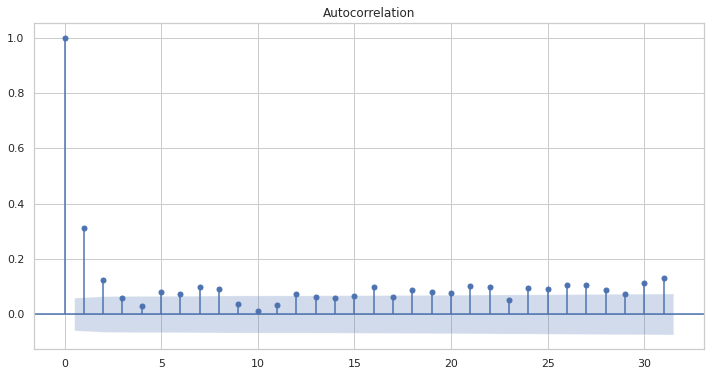

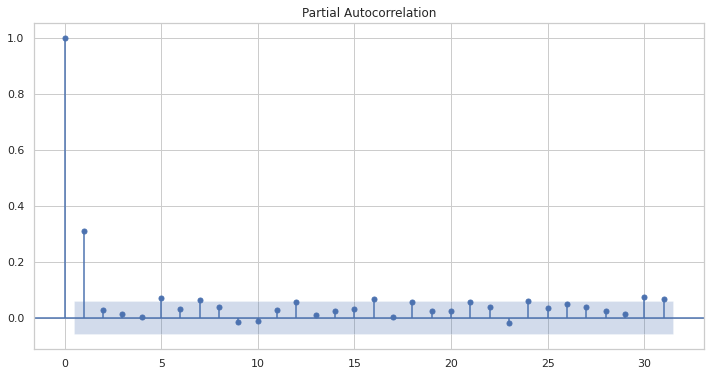

In [222]:
plot_acf(box_wind["wind_kmh"]);
plot_pacf(box_wind["wind_kmh"]);
pyplot.show()

In [223]:
orders = (3,0,2) # esto dependerá de lo que nos salga en las columnas anteriores
model_box_wind = ARIMA(box_wind['wind_kmh'], order = orders)
model_box_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [225]:
arma8 = model_box_wind.fit()
print(arma8.summary())

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                              ARMA Model Results                              
Dep. Variable:               wind_kmh   No. Observations:                 1096
Model:                     ARMA(3, 2)   Log Likelihood               -3666.752
Method:                       css-mle   S.D. of innovations              6.832
Date:                Wed, 06 Oct 2021   AIC                           7347.505
Time:                        10:01:12   BIC                           7382.501
Sample:                    01-01-2018   HQIC                          7360.746
                         - 12-31-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -330.5149        nan        nan        nan         nan         nan
ar.L1.wind_kmh     0.4317        nan        nan        nan         nan         nan
ar.L2.wind_kmh     0.7612        nan

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


### Puerto escondido

#### Wave height

In [231]:
pe_wave = height[height["Spot"] == "Puerto Escondido"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(pe_wave.date)

pe_wave = pe_wave.set_index("date")

In [232]:
pe_wave.head()

,Spot,height_ft
date,,
2018-01-01,Puerto Escondido,1.600000
2018-01-02,Puerto Escondido,2.500000
2018-01-03,Puerto Escondido,3.666667
2018-01-04,Puerto Escondido,4.333333
2018-01-05,Puerto Escondido,2.500000


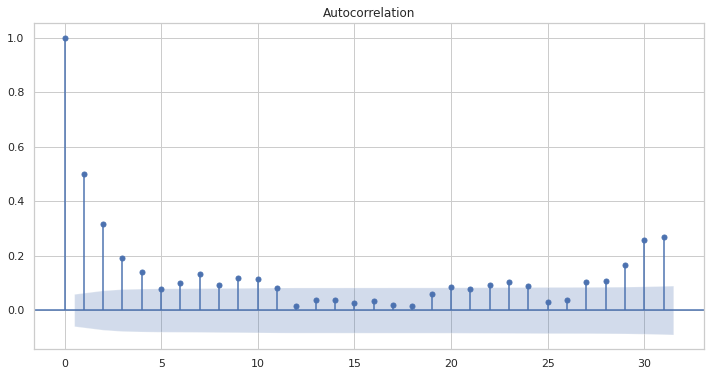

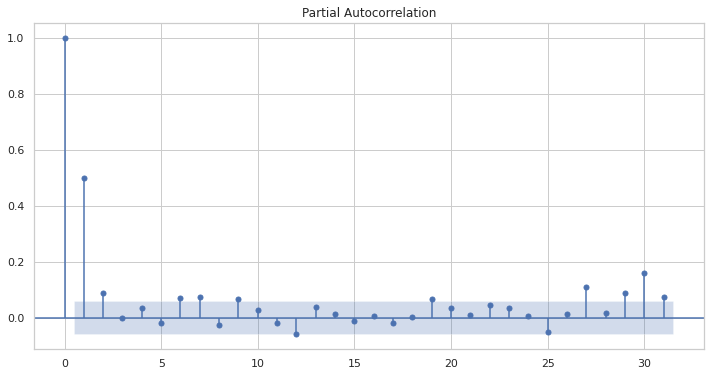

In [233]:
plot_acf(pe_wave["height_ft"]);
plot_pacf(pe_wave["height_ft"]);
pyplot.show()

In [234]:
orders = (5,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_pe_wave = ARIMA(pe_wave['height_ft'], order = orders)
model_pe_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [235]:
arma9 = model_pe_wave.fit()
print(arma9.summary())

                              ARMA Model Results                              
Dep. Variable:              height_ft   No. Observations:                 1096
Model:                     ARMA(5, 3)   Log Likelihood               -1576.375
Method:                       css-mle   S.D. of innovations              1.019
Date:                Wed, 06 Oct 2021   AIC                           3172.749
Time:                        10:06:18   BIC                           3222.744
Sample:                    01-01-2018   HQIC                          3191.666
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.2370      0.136     23.742      0.000       2.970       3.504
ar.L1.height_ft     0.8597      0.041     20.770      0.000       0.779       0.941
ar.L2.height_ft    -0.5599      

#### Wind speed

In [236]:
pe_wind = wind_speed[wind_speed["Spot"] == "Puerto Escondido"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(pe_wind.date)

pe_wind = pe_wind.set_index("date")

In [263]:
pe_wind.head()

,Spot,wind_kmh,wind_kmh2
date,,,
2018-01-01,Puerto Escondido,5.333333,5.333333
2018-01-02,Puerto Escondido,4.666667,-0.666667
2018-01-03,Puerto Escondido,5.333333,0.666667
2018-01-04,Puerto Escondido,5.333333,0.000000
2018-01-05,Puerto Escondido,4.000000,-1.333333


In [260]:
pe_wind['wind_kmh2'] = pe_wind['wind_kmh'] - pe_wind['wind_kmh'].shift(1)

In [262]:
pe_wind.wind_kmh2[0] = pe_wind.wind_kmh[0]

/tmp/ipykernel_570/2286557023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pe_wind.wind_kmh2[0] = pe_wind.wind_kmh[0]


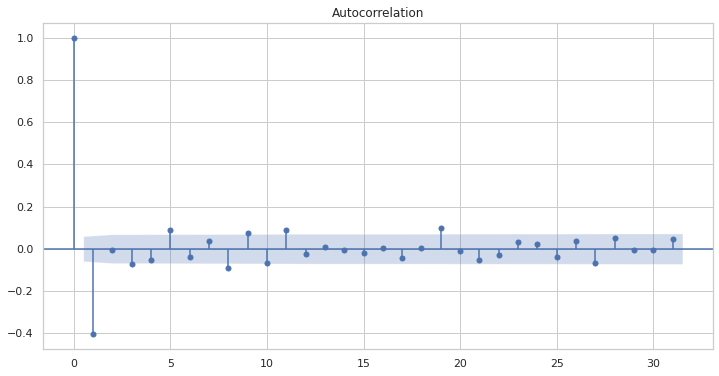

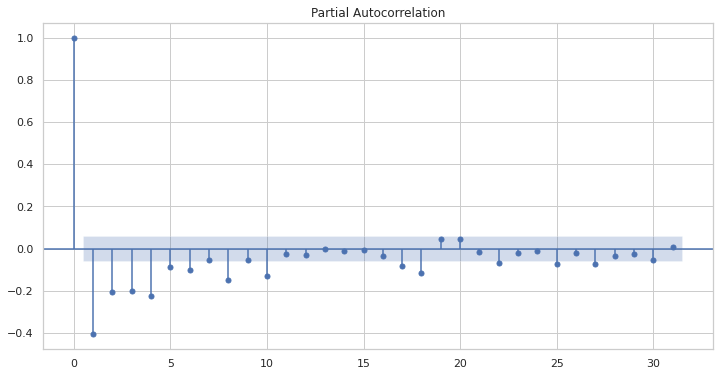

In [265]:
plot_acf(pe_wind["wind_kmh2"]);
plot_pacf(pe_wind["wind_kmh2"]);
pyplot.show()

In [266]:
orders = (2,0,7) # esto dependerá de lo que nos salga en las columnas anteriores
model_pe_wind = ARIMA(pe_wind['wind_kmh2'], order = orders)
model_pe_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [267]:
arma10 = model_pe_wind.fit()
print(arma10.summary())

                              ARMA Model Results                              
Dep. Variable:              wind_kmh2   No. Observations:                 1096
Model:                     ARMA(2, 7)   Log Likelihood               -2504.372
Method:                       css-mle   S.D. of innovations              2.375
Date:                Wed, 06 Oct 2021   AIC                           5030.743
Time:                        11:30:50   BIC                           5085.737
Sample:                    01-01-2018   HQIC                          5051.552
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0012      0.003      0.477      0.634      -0.004       0.006
ar.L1.wind_kmh2    -0.6514      0.450     -1.447      0.148      -1.534       0.231
ar.L2.wind_kmh2     0.2574      

### Itacoatiara


#### Wave height

In [268]:
ita_wave = height[height["Spot"] == "Itacoatiara"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(ita_wave.date)

ita_wave = ita_wave.set_index("date")

In [269]:
ita_wave.head()

,Spot,height_ft
date,,
2018-01-01,Itacoatiara,0.800000
2018-01-02,Itacoatiara,3.833333
2018-01-03,Itacoatiara,1.766667
2018-01-04,Itacoatiara,1.600000
2018-01-05,Itacoatiara,1.400000


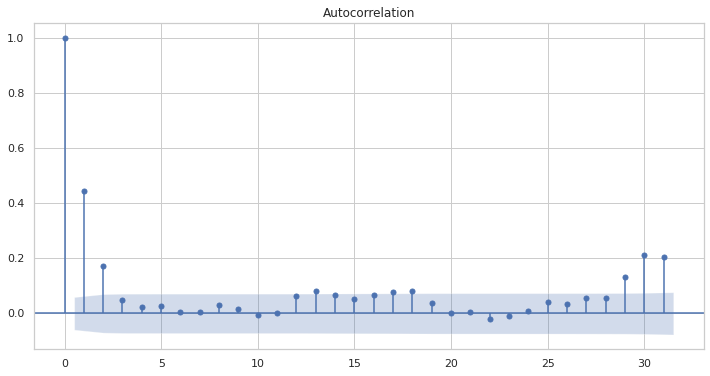

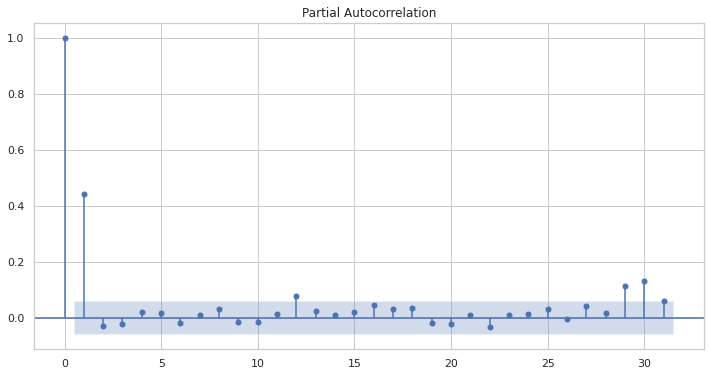

In [270]:
plot_acf(ita_wave["height_ft"]);
plot_pacf(ita_wave["height_ft"]);
pyplot.show()

In [271]:
orders = (3,0,2) # esto dependerá de lo que nos salga en las columnas anteriores
model_ita_wave = ARIMA(ita_wave['height_ft'], order = orders)
model_ita_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [272]:
arma11 = model_ita_wave.fit()
print(arma11.summary())

At iterate   90    f=  2.55869D+00    |proj g|=  4.89071D-03

At iterate   95    f=  2.55869D+00    |proj g|=  1.56608D-03

At iterate  100    f=  2.55869D+00    |proj g|=  8.73124D-04

At iterate  105    f=  2.55869D+00    |proj g|=  2.01794D-03

At iterate  110    f=  2.55869D+00    |proj g|=  9.77263D-04

At iterate  115    f=  2.55869D+00    |proj g|=  7.96563D-04

At iterate  120    f=  2.55869D+00    |proj g|=  1.61000D-03

At iterate  125    f=  2.55869D+00    |proj g|=  5.10791D-04

At iterate  130    f=  2.55869D+00    |proj g|=  7.65077D-04

At iterate  135    f=  2.55869D+00    |proj g|=  5.88241D-04

At iterate  140    f=  2.55869D+00    |proj g|=  1.77782D-03

At iterate  145    f=  2.55869D+00    |proj g|=  3.73728D-03

At iterate  150    f=  2.55869D+00    |proj g|=  8.95328D-04

At iterate  155    f=  2.55869D+00    |proj g|=  6.76126D-04

At iterate  160    f=  2.55869D+00    |proj g|=  1.13118D-03

At iterate  165    f=  2.55869D+00    |proj g|=  6.99081D-03

At itera

#### Wind Speed

In [273]:
ita_wind = wind_speed[wind_speed["Spot"] == "Itacoatiara"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(ita_wind.date)

ita_wind = ita_wind.set_index("date")

In [274]:
ita_wind.head()

,Spot,wind_kmh
date,,
2018-01-01,Itacoatiara,9.666667
2018-01-02,Itacoatiara,11.666667
2018-01-03,Itacoatiara,8.000000
2018-01-04,Itacoatiara,9.666667
2018-01-05,Itacoatiara,9.333333


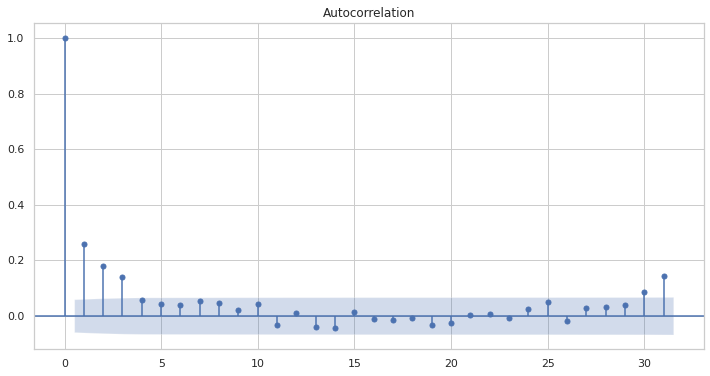

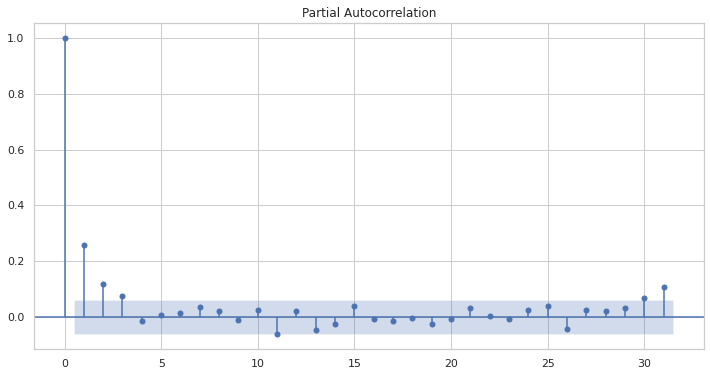

In [275]:
plot_acf(ita_wind["wind_kmh"]);
plot_pacf(ita_wind["wind_kmh"]);
pyplot.show()

In [276]:
orders = (4,0,4) # esto dependerá de lo que nos salga en las columnas anteriores
model_ita_wind = ARIMA(ita_wind['wind_kmh'], order = orders)
model_ita_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [277]:
arma12 = model_ita_wind.fit()
print(arma12.summary())

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


                              ARMA Model Results                              
Dep. Variable:               wind_kmh   No. Observations:                 1096
Model:                     ARMA(4, 4)   Log Likelihood               -3047.609
Method:                       css-mle   S.D. of innovations              3.896
Date:                Wed, 06 Oct 2021   AIC                           6115.217
Time:                        11:36:58   BIC                           6165.212
Sample:                    01-01-2018   HQIC                          6134.134
                         - 12-31-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.1369      0.145     76.636      0.000      10.852      11.422
ar.L1.wind_kmh    -0.1202      0.068     -1.768      0.077      -0.253       0.013
ar.L2.wind_kmh     1.3900      0.055

In [280]:
full.Spot.value_counts()

Nazare              3288
Pipeline            3288
Fronton             3288
The Box             3288
Puerto Escondido    3288
Itacoatiara         3288
Padang-Padang       3288
Mosca Point         3288
Tauro               3288
Mundaka             2193
Name: Spot, dtype: int64

### Padang Padang

### Wave height

In [281]:
pp_wave = height[height["Spot"] == "Padang-Padang"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(pp_wave.date)

pp_wave = pp_wave.set_index("date")

In [282]:
pp_wave.head()

,Spot,height_ft
date,,
2018-01-01,Padang-Padang,5.666667
2018-01-02,Padang-Padang,5.333333
2018-01-03,Padang-Padang,3.833333
2018-01-04,Padang-Padang,5.166667
2018-01-05,Padang-Padang,5.500000


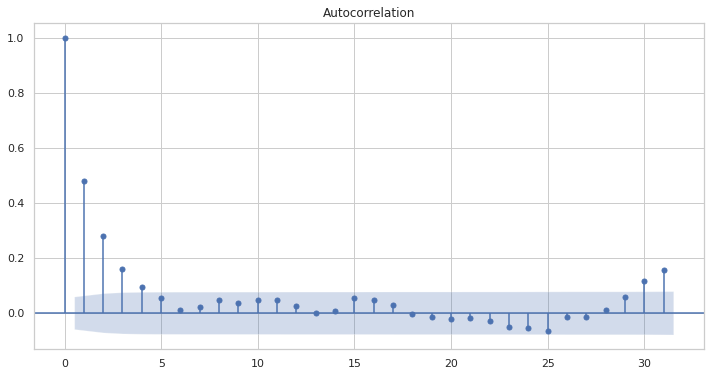

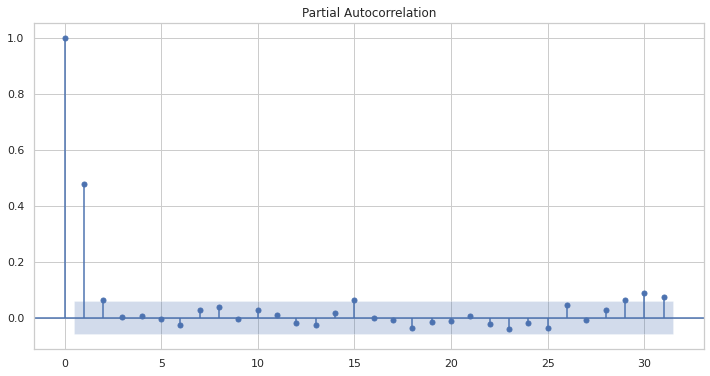

In [283]:
plot_acf(pp_wave["height_ft"]);
plot_pacf(pp_wave["height_ft"]);
pyplot.show()

In [284]:
orders = (5,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_pp_wave = ARIMA(pp_wave['height_ft'], order = orders)
model_pp_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [285]:
arma13 = model_pp_wave.fit()
print(arma13.summary())

Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     35      1     0     0   3.775D-07   1.806D+00
  F =   1.8063646528395718     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.80009D+00    |proj g|=  1.51003D-01

At iterate    5    f=  2.78568D+00    |proj g|=  4.30285D-02

At iterate   10    f=  2.78461D+00    |proj g|=  8.28970D-02

At iterate   15    f=  2.78154D+00    |proj g|=  1.05250D-02

At iterate   20    f=  2.78148D+00    |proj g|=  1.57758D-03


/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              ARMA Model Results                              
Dep. Variable:              height_ft   No. Observations:                 1096
Model:                     ARMA(5, 3)   Log Likelihood               -1952.652
Method:                       css-mle   S.D. of innovations              1.436
Date:                Wed, 06 Oct 2021   AIC                           3925.304
Time:                        11:43:38   BIC                           3975.298
Sample:                    01-01-2018   HQIC                          3944.220
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.0696      0.089     56.790      0.000       4.895       5.245
ar.L1.height_ft    -0.5180        nan        nan        nan         nan         nan
ar.L2.height_ft    -0.4841      

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


#### Wind speed

In [286]:
pp_wind = wind_speed[wind_speed["Spot"] == "Padang-Padang"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(pp_wind.date)

pp_wind = pp_wind.set_index("date")

In [287]:
pp_wind.head()

,Spot,wind_kmh
date,,
2018-01-01,Padang-Padang,12.333333
2018-01-02,Padang-Padang,20.333333
2018-01-03,Padang-Padang,6.666667
2018-01-04,Padang-Padang,6.000000
2018-01-05,Padang-Padang,17.000000


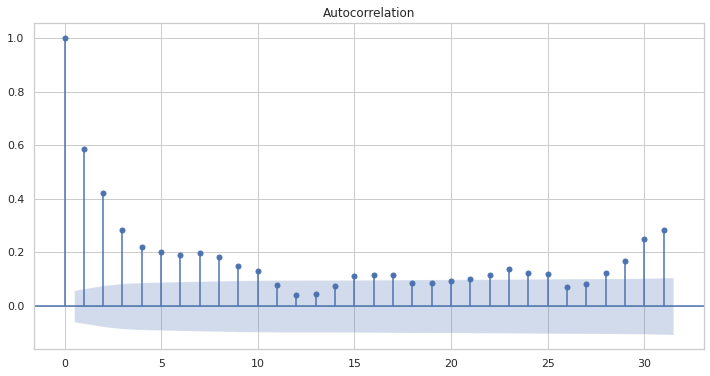

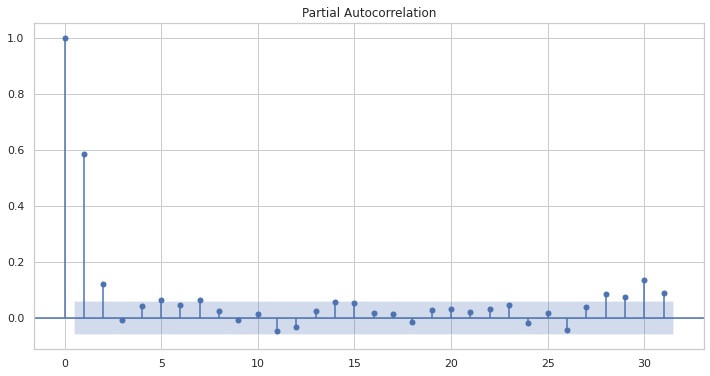

In [288]:
plot_acf(pp_wind["wind_kmh"]);
plot_pacf(pp_wind["wind_kmh"]);
pyplot.show()

In [289]:
orders = (11,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_pp_wind = ARIMA(pp_wind['wind_kmh'], order = orders)
model_pp_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [290]:
arma14 = model_pp_wind.fit()
print(arma14.summary())

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              ARMA Model Results                              
Dep. Variable:               wind_kmh   No. Observations:                 1096
Model:                    ARMA(11, 3)   Log Likelihood               -3128.235
Method:                       css-mle   S.D. of innovations              4.192
Date:                Wed, 06 Oct 2021   AIC                           6288.469
Time:                        11:47:26   BIC                           6368.460
Sample:                    01-01-2018   HQIC                          6318.736
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.5122      0.464     26.948      0.000      11.602      13.422
ar.L1.wind_kmh      2.6418      0.004    638.568      0.000       2.634       2.650
ar.L2.wind_kmh     -3.0007      

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


### Mosca Point

#### Wave height

In [291]:
mosca_wave = height[height["Spot"] == "Mosca Point"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(mosca_wave.date)

mosca_wave = mosca_wave.set_index("date")

In [292]:
mosca_wave.head()

,Spot,height_ft
date,,
2018-01-01,Mosca Point,3.666667
2018-01-02,Mosca Point,7.666667
2018-01-03,Mosca Point,1.100000
2018-01-04,Mosca Point,4.833333
2018-01-05,Mosca Point,2.666667


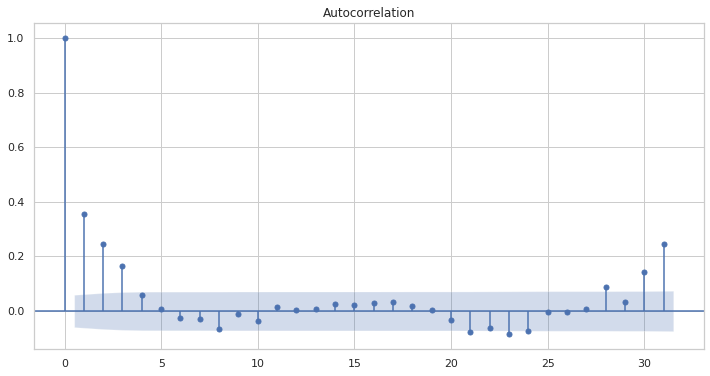

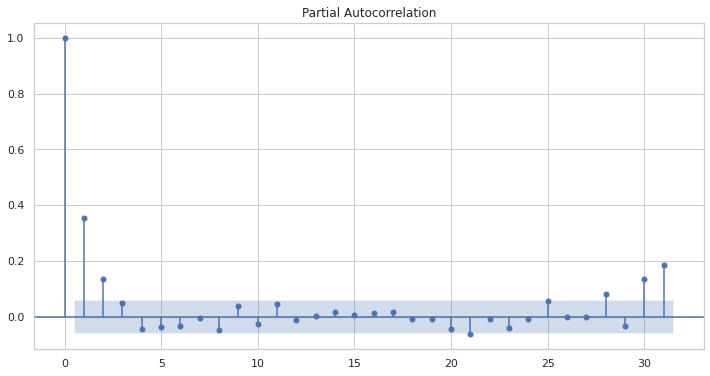

In [293]:
plot_acf(mosca_wave["height_ft"]);
plot_pacf(mosca_wave["height_ft"]);
pyplot.show()

In [294]:
orders = (4,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_mosca_wave = ARIMA(mosca_wave['height_ft'], order = orders)
model_mosca_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [295]:
arma15 = model_mosca_wave.fit()
print(arma15.summary())

                              ARMA Model Results                              
Dep. Variable:              height_ft   No. Observations:                 1096
Model:                     ARMA(4, 3)   Log Likelihood               -2067.857
Method:                       css-mle   S.D. of innovations              1.595
Date:                Wed, 06 Oct 2021   AIC                           4153.713
Time:                        11:51:04   BIC                           4198.708
Sample:                    01-01-2018   HQIC                          4170.738
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.2972      0.081     40.572      0.000       3.138       3.457
ar.L1.height_ft     0.4090      0.223      1.836      0.066      -0.027       0.845
ar.L2.height_ft     0.7690      

#### Wind speed

In [296]:
mosca_wind = wind_speed[wind_speed["Spot"] == "Mosca Point"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(mosca_wind.date)

mosca_wind = mosca_wind.set_index("date")

In [297]:
mosca_wind.head()

,Spot,wind_kmh
date,,
2018-01-01,Mosca Point,19.666667
2018-01-02,Mosca Point,31.000000
2018-01-03,Mosca Point,30.333333
2018-01-04,Mosca Point,4.000000
2018-01-05,Mosca Point,18.333333


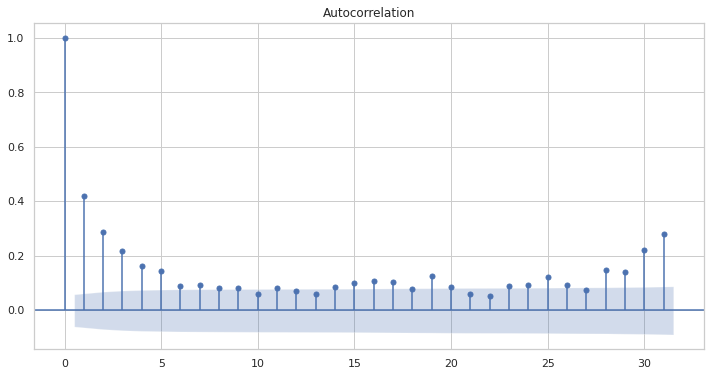

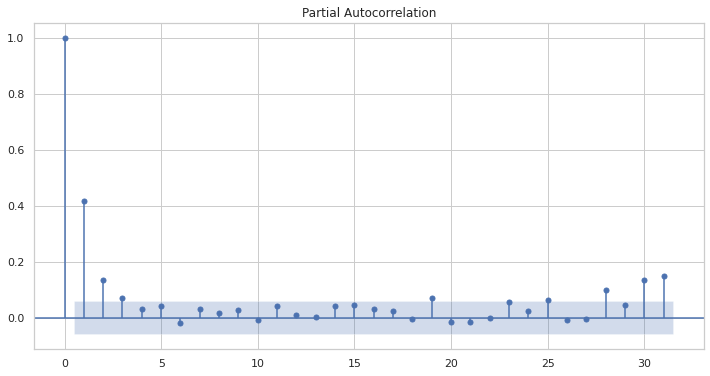

In [298]:
plot_acf(mosca_wind["wind_kmh"]);
plot_pacf(mosca_wind["wind_kmh"]);
pyplot.show()

In [299]:
orders = (10,0,4) # esto dependerá de lo que nos salga en las columnas anteriores
model_mosca_wind = ARIMA(mosca_wind['wind_kmh'], order = orders)
model_mosca_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [300]:
arma16 = model_mosca_wind.fit()
print(arma16.summary())

At iterate  465    f=  1.78162D+00    |proj g|=  3.94151D-03

At iterate  470    f=  1.78162D+00    |proj g|=  3.25184D-03

At iterate  475    f=  1.78162D+00    |proj g|=  3.95004D-03

At iterate  480    f=  1.78162D+00    |proj g|=  4.18412D-03

At iterate  485    f=  1.78162D+00    |proj g|=  3.29119D-03

At iterate  490    f=  1.78162D+00    |proj g|=  2.52737D-02

At iterate  495    f=  1.78162D+00    |proj g|=  1.83753D-03

At iterate  500    f=  1.78162D+00    |proj g|=  5.68057D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9    500    949      7     1     0   5.681D-04   1.782D+00
  F =   1.781616707405

### Tauro

#### Wave height

In [301]:
tauro_wave = height[height["Spot"] == "Tauro"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(tauro_wave.date)

tauro_wave = tauro_wave.set_index("date")

In [302]:
tauro_wave.head()

,Spot,height_ft
date,,
2018-01-01,Tauro,1.066667
2018-01-02,Tauro,0.500000
2018-01-03,Tauro,9.333333
2018-01-04,Tauro,1.366667
2018-01-05,Tauro,1.033333


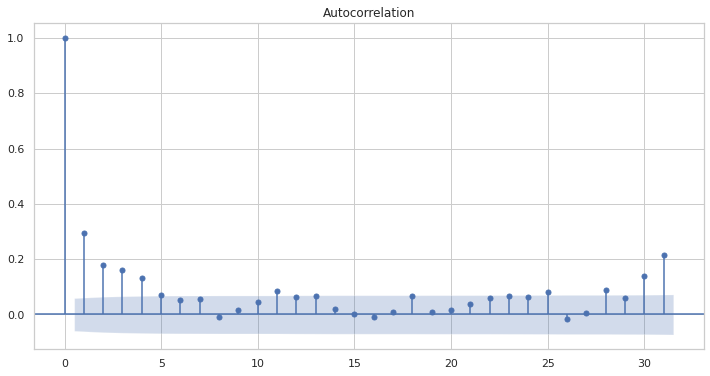

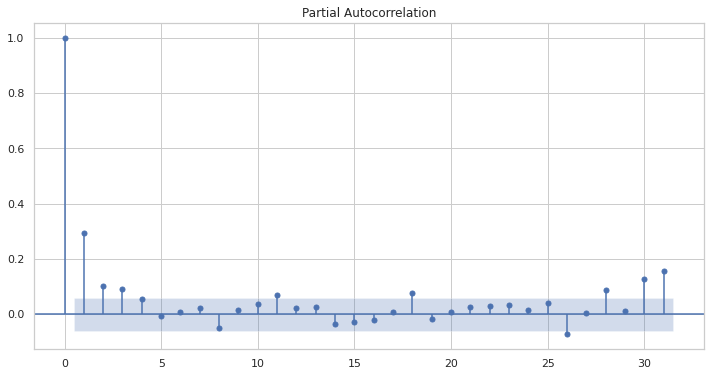

In [303]:
plot_acf(tauro_wave["height_ft"]);
plot_pacf(tauro_wave["height_ft"]);
pyplot.show()

In [304]:
orders = (6,0,4) # esto dependerá de lo que nos salga en las columnas anteriores
model_tauro_wave = ARIMA(tauro_wave['height_ft'], order = orders)
model_tauro_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [305]:
arma17 = model_tauro_wave.fit()
print(arma17.summary())

                              ARMA Model Results                              
Dep. Variable:              height_ft   No. Observations:                 1096
Model:                     ARMA(6, 4)   Log Likelihood               -1403.017
Method:                       css-mle   S.D. of innovations              0.868
Date:                Wed, 06 Oct 2021   AIC                           2830.034
Time:                        11:56:49   BIC                           2890.027
Sample:                    01-01-2018   HQIC                          2852.734
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.2345      0.093     13.320      0.000       1.053       1.416
ar.L1.height_ft     0.5814      0.308      1.885      0.059      -0.023       1.186
ar.L2.height_ft    -0.1185      

#### Wind speed

In [306]:
tauro_wind = wind_speed[wind_speed["Spot"] == "Tauro"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(tauro_wind.date)

tauro_wind = tauro_wind.set_index("date")

In [323]:
tauro_wind.head()

,Spot,wind_kmh,wind_kmh2
date,,,
2018-01-01,Tauro,19.666667,2.978925
2018-01-02,Tauro,31.000000,3.433987
2018-01-03,Tauro,30.333333,3.412247
2018-01-04,Tauro,4.000000,1.386294
2018-01-05,Tauro,18.333333,2.908721


In [322]:
tauro_wind['wind_kmh2'] = np.log(tauro_wind['wind_kmh'])

In [313]:
tauro_wind.wind_kmh2[0] = tauro_wind.wind_kmh[0]

/tmp/ipykernel_570/2917345379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tauro_wind.wind_kmh2[0] = tauro_wind.wind_kmh[0]


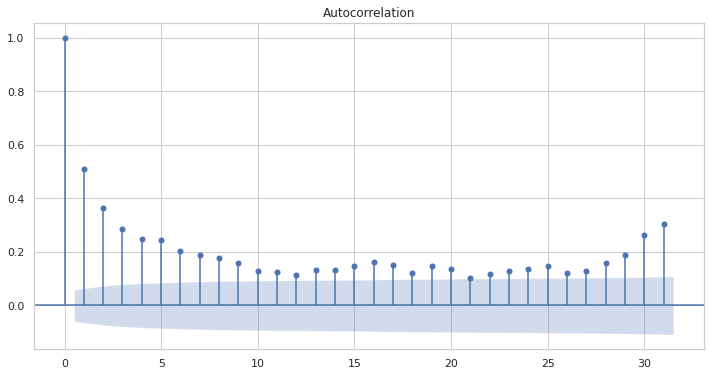

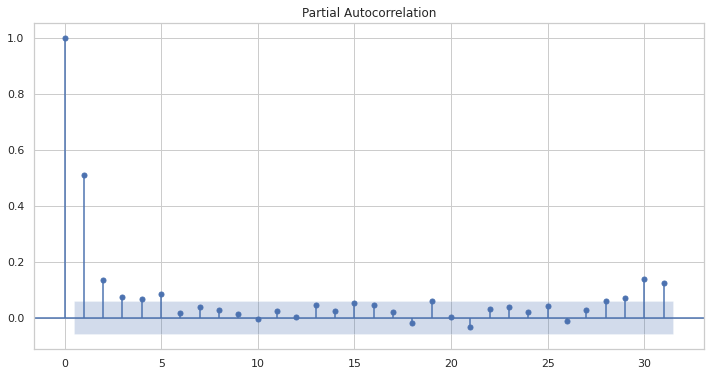

In [324]:
plot_acf(tauro_wind["wind_kmh2"]);
plot_pacf(tauro_wind["wind_kmh2"]);
pyplot.show()

In [325]:
orders = (21,0,6) # esto dependerá de lo que nos salga en las columnas anteriores
model_tauro_wind = ARIMA(tauro_wind['wind_kmh2'], order = orders)
model_tauro_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [326]:
arma18 = model_tauro_wind.fit()
print(arma18.summary())

At iterate  205    f=  3.07552D+00    |proj g|=  1.23919D-03

At iterate  210    f=  3.07547D+00    |proj g|=  9.40270D-04

At iterate  215    f=  3.07546D+00    |proj g|=  1.57163D-04

At iterate  220    f=  3.07546D+00    |proj g|=  1.55254D-04

At iterate  225    f=  3.07546D+00    |proj g|=  6.58140D-05

At iterate  230    f=  3.07546D+00    |proj g|=  1.86517D-05

At iterate  235    f=  3.07546D+00    |proj g|=  7.98916D-05

At iterate  240    f=  3.07546D+00    |proj g|=  4.44089D-05

At iterate  245    f=  3.07546D+00    |proj g|=  2.04814D-04

At iterate  250    f=  3.07546D+00    |proj g|=  3.49942D-05

At iterate  255    f=  3.07546D+00    |proj g|=  5.32019D-05

At iterate  260    f=  3.07546D+00    |proj g|=  3.38396D-05

At iterate  265    f=  3.07546D+00    |proj g|=  2.52243D-05

At iterate  270    f=  3.07546D+00    |proj g|=  2.88658D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments e

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              ARMA Model Results                              
Dep. Variable:              wind_kmh2   No. Observations:                 1096
Model:                    ARMA(21, 6)   Log Likelihood                -637.519
Method:                       css-mle   S.D. of innovations              0.431
Date:                Wed, 06 Oct 2021   AIC                           1333.038
Time:                        12:31:53   BIC                           1478.022
Sample:                    01-01-2018   HQIC                          1387.896
                         - 12-31-2020                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.4374      0.055     44.336      0.000       2.330       2.545
ar.L1.wind_kmh2      0.6578        nan        nan        nan         nan         nan
ar.L2.wind_kmh2     -0.7373 

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


### Mundaka


#### Wave height

In [327]:
mun_wave = height[height["Spot"] == "Mundaka"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(mun_wave.date)

mun_wave = mun_wave.set_index("date")

In [328]:
mun_wave.head()

,Spot,height_ft
date,,
2019-01-01,Mundaka,0.966667
2019-01-02,Mundaka,12.000000
2019-01-03,Mundaka,3.666667
2019-01-04,Mundaka,4.000000
2019-01-05,Mundaka,3.000000


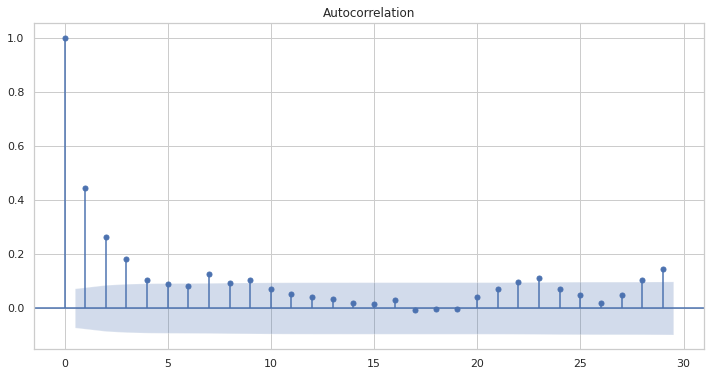

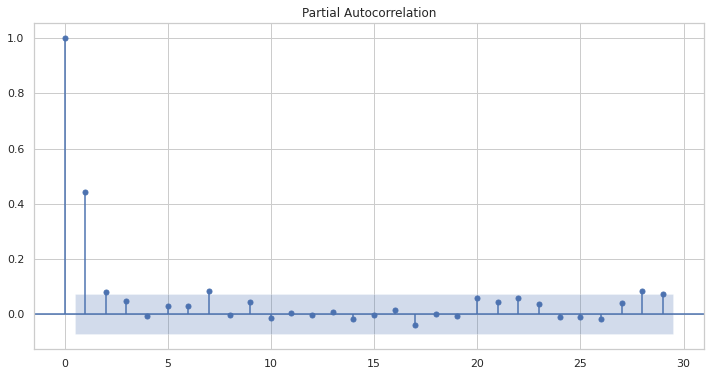

In [329]:
plot_acf(mun_wave["height_ft"]);
plot_pacf(mun_wave["height_ft"]);
pyplot.show()

In [330]:
orders = (5,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_mun_wave = ARIMA(mun_wave['height_ft'], order = orders)
model_mun_wave;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [331]:
arma19 = model_mun_wave.fit()
print(arma19.summary())

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood

                              ARMA Model Results                              
Dep. Variable:              height_ft   No. Observations:                  731
Model:                     ARMA(5, 3)   Log Likelihood               -1845.477
Method:                       css-mle   S.D. of innovations              3.018
Date:                Wed, 06 Oct 2021   AIC                           3710.954
Time:                        12:35:15   BIC                           3756.898
Sample:                    01-01-2019   HQIC                          3728.678
                         - 12-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.9633      0.491     10.117      0.000       4.002       5.925
ar.L1.height_ft     1.4328      0.028     51.812      0.000       1.379       1.487
ar.L2.height_ft     0.5059      

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


#### Wind speed

In [332]:
mun_wind = wind_speed[wind_speed["Spot"] == "Mundaka"]

x = pd.date_range("01/01/2018","31/12/2020", freq = "D")

f = pd.infer_freq(mun_wind.date)

mun_wind = mun_wind.set_index("date")

In [333]:
mun_wind.head()

,Spot,wind_kmh
date,,
2019-01-01,Mundaka,3.666667
2019-01-02,Mundaka,24.333333
2019-01-03,Mundaka,4.000000
2019-01-04,Mundaka,8.333333
2019-01-05,Mundaka,13.000000


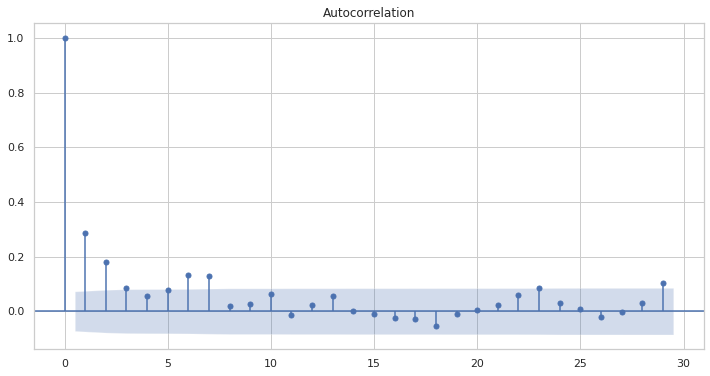

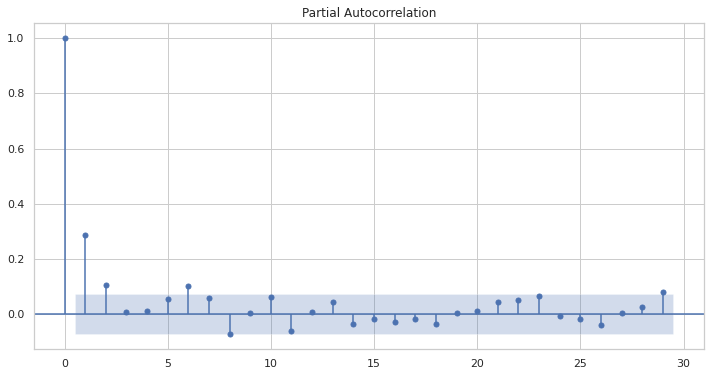

In [334]:
plot_acf(mun_wind["wind_kmh"]);
plot_pacf(mun_wind["wind_kmh"]);
pyplot.show()

In [335]:
orders = (4,0,3) # esto dependerá de lo que nos salga en las columnas anteriores
model_mun_wind = ARIMA(mun_wind['wind_kmh'], order = orders)
model_mun_wind;

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [336]:
arma20 = model_mun_wind.fit()
print(arma20.summary())

At iterate   55    f=  5.84802D-01    |proj g|=  3.96939D-03

At iterate   60    f=  5.84765D-01    |proj g|=  4.45443D-03

At iterate   65    f=  5.84687D-01    |proj g|=  3.71942D-03

At iterate   70    f=  5.84659D-01    |proj g|=  6.08270D-03

At iterate   75    f=  5.84613D-01    |proj g|=  9.15225D-03

At iterate   80    f=  5.84562D-01    |proj g|=  1.34954D-02

At iterate   85    f=  5.84474D-01    |proj g|=  1.84381D-02

At iterate   90    f=  5.84419D-01    |proj g|=  7.86448D-03

At iterate   95    f=  5.84358D-01    |proj g|=  2.09301D-02

At iterate  100    f=  5.84243D-01    |proj g|=  3.89904D-02

At iterate  105    f=  5.84087D-01    |proj g|=  1.41894D-02

At iterate  110    f=  5.84021D-01    |proj g|=  1.40484D-02

At iterate  115    f=  5.83880D-01    |proj g|=  1.96965D-02

At iterate  120    f=  5.83701D-01    |proj g|=  8.01950D-02

At iterate  125    f=  5.83298D-01    |proj g|=  6.57124D-02

At iterate  130    f=  5.83122D-01    |proj g|=  3.03613D-02

At itera

## Plotting ARMA

Nazare : [arma1,arma2]  
Pipeline : [arma3,arma4]  
Fronton :[arma5,arma6]  
The Box :[arma7,arma8]  
Puerto Escondido: [arma9,arma10]  
Itacoatiara : [arma11,arma12]  
Padang-Padang :[arma13,arma14]  
Mosca Point: [arma15,arma16]  
Tauro:[arma17,arma18]  
Mundaka: [arma19,arma20]  


In [351]:
from pandas import datetime

/tmp/ipykernel_570/2431674481.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [368]:
start_index = "2021-10-08"
end_index = "2022-10-08"


/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


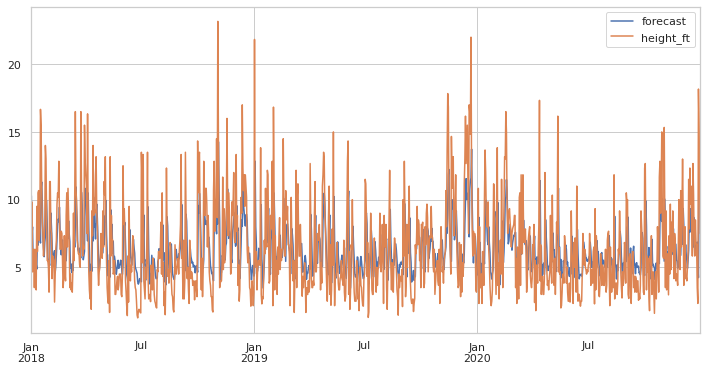

In [371]:
arma1.plot_predict(dynamic = False);

In [378]:
n_periods = 42
fc = arma1.predict()

In [376]:
fc

2018-01-01     6.370710
2018-01-02    10.293866
2018-01-03     7.312141
2018-01-04     7.990001
2018-01-05     5.243207
                ...    
2020-12-27     5.093870
2020-12-28     4.238251
2020-12-29    10.883798
2020-12-30    11.435315
2020-12-31     9.957047
Freq: D, Length: 1096, dtype: float64

ValueError: Length of values (639) does not match length of index (366)

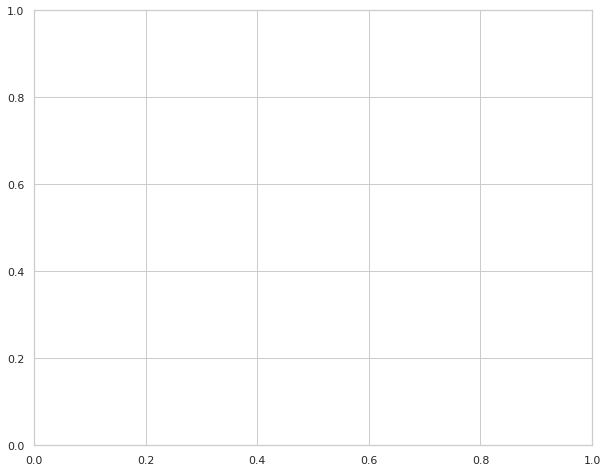

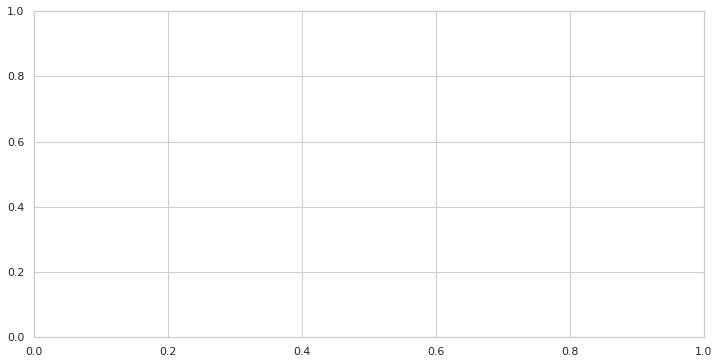

In [382]:
fig, ax = plt.subplots(figsize=(10,8))
fig = arma1.plot_predict(start='2021-10', end='2022-10')
legend = ax.legend(loc='upper left')

In [383]:
forecast_wave = arma6.predict(start = start_index, end = end_index)

ValueError: Length of values (646) does not match length of index (366)

In [349]:
def predict(wave_model,wind_model):
    start_index = datetime(2021, 10, 8)
    end_index = datetime(2022, 10, 8)
    forecast_wave = wave_model.predict(start = start_index, end = end_index)
    forecast_wind = wind_model.predict(start = start_index, end = end_index)
    return forecast_wave, forecast_wind
    

In [352]:
predict(arma1,arma2)

/home/lukesmith194/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


ValueError: Length of values (646) does not match length of index (366)